Софья Потапова (394 группа)
Дочитайте до конца, пожалуйста) Были попытки прикрутить несколько инетересных фич

In [69]:
import numpy as np
import pandas as pd
import sys
from knn import MatrixBasedKNearestNeighbor, KDBasedKNearestNeighbor

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
df = pd.read_csv('kaggle_data/train.csv')
test = pd.read_csv('kaggle_data/test.csv')


In [244]:
X_train, Y_train = df[df.columns[1:]].values, df['label'].values
X_test = np.array(test)

In [811]:
X_log_train = np.log(X_train)
X_log_test = np.log(X_test)
for i in range(X_log_train.shape[0]):
    for j in range(X_log_train.shape[1]):
        X_log_train[i][j] = 1 if X_log_train[i][j] == -inf else X_log_train[i][j]
for i in range(X_log_test.shape[0]):
    for j in range(X_log_test.shape[1]):
        X_log_test[i][j] = 1 if X_log_test[i][j] == -inf else X_log_test[i][j]

In [812]:
X_cube_train = np.ndarray(shape=(X_train.shape[0], X_train.shape[1]))
X_cube_test = np.ndarray(shape=(X_test.shape[0], X_test.shape[1]))
for i in range(X_cube_train.shape[0]):
    for j in range(X_cube_train.shape[1]):
        X_cube_train[i][j] = X_train[i][j] ** (1 / 3.0)
for i in range(X_cube_test.shape[0]):
    for j in range(X_cube_test.shape[1]):
        X_cube_test[i][j] = X_test[i][j] ** (1 / 3.0)

In [72]:
def plot_image(img, im_size=28):
    pylab.imshow(img.reshape(im_size, im_size), cmap=pylab.cm.gray)
    
def plot_grid(imgs, nrows, ncols, dataset=X_train, im_size=28):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, img in enumerate(imgs):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(img)
        pylab.axis('off')

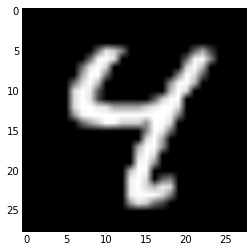

In [382]:
plot_image(X_cube_test[6])

## Plot means

In [74]:
avarage_class_imgs = []

#X_tr = pd.DataFrame(X_train)
#X_tr['Y']=Y_train

for c in range(10):
    #mean_c = np.array(np.mean(X_tr.loc[Y_train == c])[:-1])
    mean_c = np.mean([X_train[i] for i in range(len(X_train)) if Y_train[i] == c], axis=0)
    avarage_class_imgs.append(mean_c)
    pass

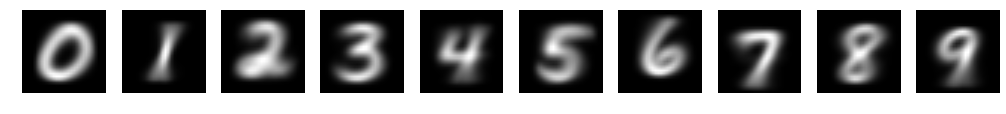

In [75]:
# Plot your means, note that is should be similar on to real smooth numbers
plot_grid(avarage_class_imgs, nrows=1, ncols=10)

## Code Matrix Based KNN

In [27]:
# Code matrix based KNN with L2 norn by feel MatrixBasedKNearestNeighbor class
# Use predict on to X_train[:100] only for debug

In [78]:
# KNN two loops
knn_clf_loop1 = MatrixBasedKNearestNeighbor(num_loops=2)
knn_clf_loop1 = knn_clf_loop1.fit(X_train, Y_train)
%time y_pred1 = knn_clf_loop1.predict(X_train[:100])

CPU times: user 53.2 s, sys: 0 ns, total: 53.2 s
Wall time: 53.2 s


In [79]:
# KNN one loops

knn_clf_loop2 = MatrixBasedKNearestNeighbor(num_loops=1)
knn_clf_loop2 = knn_clf_loop2.fit(X_train, Y_train)
%time y_pred2 = knn_clf_loop2.predict(X_train[:100])

CPU times: user 36.1 s, sys: 0 ns, total: 36.1 s
Wall time: 36.4 s


In [80]:
#check yourself
print('good' if np.linalg.norm(y_pred1 - y_pred2) < 1e-4 else 'fail')

good


In [81]:
# KNN no loops

knn_clf_loop3 = MatrixBasedKNearestNeighbor(num_loops=0)
knn_clf_loop3 = knn_clf_loop3.fit(X_train, Y_train)
%time y_pred3 = knn_clf_loop3.predict(X_train[:100])

CPU times: user 31.4 s, sys: 264 ms, total: 31.7 s
Wall time: 31.8 s


In [82]:
#check yourself
print('good' if np.linalg.norm(y_pred1 - y_pred3) < 1e-4 else 'fail')

good


## Code kd_tree based KNN

In [83]:
import scipy
from scipy import spatial
from sklearn.neighbors import KDTree
kd_tree = KDTree(X_train, metric='minkowski') 
kd_tree.valid_metrics


['manhattan',
 'cityblock',
 'minkowski',
 'chebyshev',
 'euclidean',
 'infinity',
 'l1',
 'p',
 'l2']

In [85]:
# KNN kd_tree

knn_clf_loop4 = KDBasedKNearestNeighbor()
knn_clf_loop4 = knn_clf_loop4.fit(X_train, Y_train)
%time y_pred4 = knn_clf_loop4.predict(X_train[:100])

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.1 s


In [86]:
#check yourself
print('good' if np.linalg.norm(y_pred1 - y_pred4) < 1e-4 else 'fail')

good


## Code Accuracy score and Cross Validation Prosses

In [87]:
# Accuracy

def accuracy(y_true, y_predict):
    score = 0
    for i in range(len(y_true)):
        score += (y_true[i] == y_predict[i])
    return score / len(y_true)


In [88]:
print('good' if accuracy([1, 1, 1, 0], [1, 1, 1, 5]) == 0.75 else 'fail')

good


In [202]:
# Cross validation

def cross_validation(X, y, kernel, k = 1, cv_fold=5):
    scores = []
    cv_list = list(zip(X, y))
    np.random.shuffle(cv_list)
    X = np.array([x for (x,y) in cv_list])
    y = np.array([y for (x,y) in cv_list])
    knn_clf = KDBasedKNearestNeighbor()
    cv_size = (len(X) + cv_fold - 1) // cv_fold
    for i in range(cv_fold):
        X_i = np.delete(X,range(i * cv_size, (i + 1) * cv_size), axis=0)
        y_i = np.delete(y,range(i * cv_size, (i + 1) * cv_size))
        knn_clf.fit(X_i, y_i)
        y_pred = knn_clf.predict(X[i * cv_size : (i + 1) * cv_size], kernel, k)
        scores.append(accuracy(y[i * cv_size : (i + 1) * cv_size], y_pred))
    return np.mean(scores)

In [97]:
#kernels
def E(r):
    return 3 / 4 * (1 - r ** 2) * (r <= 1)

def Q(r):
    return 15 / 16 * (1 - r ** 2) ** 2 * (r <= 1)

def T(r):
    return (1 - r) * (r <= 1)

def G(r):
    return e ** (-r ** 2 / 2) / (2 * pi) ** 0.5

def P(r):
    return 0.5 * (r <= 1)

In [124]:
print(cross_validation(X_train, Y_train, E))

0.9587


In [126]:
print(cross_validation(X_train, Y_train, E, 3))

0.9593


In [136]:
print(cross_validation(X_train, Y_train, E, 5))

0.95835


In [203]:
E_cv_scores = []
for i in range(8):
    E_cv_scores.append(cross_validation(X_train, Y_train, E, k = i))


In [184]:
Q_cv_scores = []
for i in range(8):
    Q_cv_scores.append(cross_validation(X_train, Y_train, Q, k = i))


In [184]:
T_cv_scores = []
for i in range(8):
    T_cv_scores.append(cross_validation(X_train, Y_train, T, k = i))


In [184]:
G_cv_scores = []
for i in range(8):
    G_cv_scores.append(cross_validation(X_train, Y_train, G, k = i))


In [184]:
P_cv_scores = []
for i in range(8):
    P_cv_scores.append(cross_validation(X_train, Y_train, P, k = i))


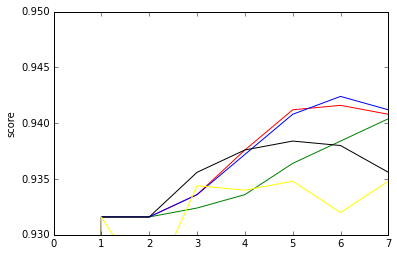

In [189]:
import matplotlib.pyplot as plt
plt.plot(E_cv_scores[:], color='red', label='E')
plt.plot(Q_cv_scores, color='green', label='Q')
plt.plot(T_cv_scores, color='blue', label='T')
plt.plot(G_cv_scores, color='black', label='G')
plt.plot(P_cv_scores, color='yellow', label='P')
plt.ylabel('score')
plt.ylim([0.93, 0.95])
plt.show()

In [225]:
E_log_scores = []
for i in range(8):
    E_log_scores.append(cross_validation(X_log_train, Y_train, E, k = i))


In [227]:
Q_log_scores = []
for i in range(8):
    Q_log_scores.append(cross_validation(X_log_train, Y_train, Q, k = i))


In [228]:
T_log_scores = []
for i in range(8):
    T_log_scores.append(cross_validation(X_log_train, Y_train, T, k = i))


In [229]:
G_log_scores = []
for i in range(8):
    G_log_scores.append(cross_validation(X_log_train, Y_train, G, k = i))


In [230]:
P_log_scores = []
for i in range(8):
    P_log_scores.append(cross_validation(X_log_train, Y_train, P, k = i))

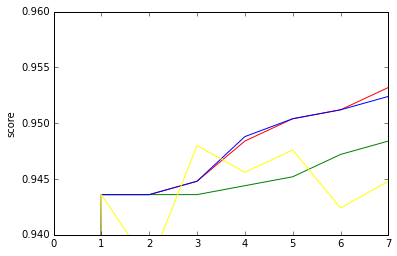

In [234]:
plt.plot(E_log_scores, color='red', label='E')
plt.plot(Q_log_scores, color='green', label='Q')
plt.plot(T_log_scores, color='blue', label='T')
plt.plot(G_log_scores, color='black', label='G')
plt.plot(P_log_scores, color='yellow', label='P')
plt.ylabel('score')
plt.ylim([0.94, 0.96])
plt.show()

In [ ]:
E_cube_scores = []
for i in range(6,8):
    E_cube_scores.append(cross_validation(X_log_train, Y_train, E, k = i))

In [ ]:
Q_cube_scores = []
for i in range(6, 8):
    Q_cube_scores.append(cross_validation(X_log_train, Y_train, Q, k = i))


In [ ]:
T_cube_scores = []
for i in range(8):
    T_cube_scores.append(cross_validation(X_log_train, Y_train, T, k = i))


In [ ]:
G_cube_scores = []
for i in range(8):
    G_cube_scores.append(cross_validation(X_log_train, Y_train, G, k = i))


In [ ]:
P_cube_scores = []
for i in range(8):
    P_cube_scores.append(cross_validation(X_log_train, Y_train, P, k = i))

In [ ]:
plt.plot(E_cube_scores, color='red', label='E')
plt.plot(Q_cube_scores, color='green', label='Q')
plt.plot(T_cube_scores, color='blue', label='T')
plt.plot(G_cube_scores, color='black', label='G')
plt.plot(P_cube_scores, color='yellow', label='P')
plt.ylabel('score')
plt.ylim([0.94, 0.96])
plt.show()

In [ ]:
# Parrametr setings, try anoter: Use grid search and random search 

In [ ]:
# Remove noize object and compare score

#Cool Bonus: Do something extra!

In [ ]:
# make more by yourself and win computation  

In [751]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_log_train, Y_train)
%time y_pred_E_7 = clf.predict(X_log_test, E, k = 7)

CPU times: user 29min 13s, sys: 608 ms, total: 29min 14s
Wall time: 29min 36s


In [247]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_cube_train, Y_train)
%time y_result = clf.predict(X_cube_test, E, k = 7)

CPU times: user 1min 9s, sys: 16 ms, total: 1min 9s
Wall time: 1min 9s


In [252]:
result = pd.DataFrame({'label':y_result})
result.to_csv('result.csv', index_label = 'Id')

#Сделаем прикольную фичу с использование вот этого http://scikit-image.org/docs/dev/auto_examples/plot_hog.html

In [255]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure

In [352]:
from collections import Counter
# Calculate the HOG features for each image in the database 
list_hog_fd = []
for feature in X_cube_train:
    fd = hog(feature.reshape((28, 28)), orientations=8, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

print("Count of digits in dataset", Counter(Y_train))

Count of digits in dataset Counter({1: 2281, 7: 2093, 3: 2076, 9: 2014, 0: 1994, 6: 1971, 4: 1945, 2: 1929, 8: 1922, 5: 1775})


In [354]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(hog_features, Y_train)
#%time y_hog_result = clf.predict(X_test, E, k = 7)

In [355]:
list_hog_fd = []
for feature in X_cube_test:
    fd = hog(feature.reshape((28, 28)), orientations=8, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_test = np.array(list_hog_fd, 'float64')

In [356]:
%time y_hog_result = clf.predict(hog_test, T, k = 7) #l1 accuracy 93,4

CPU times: user 23.1 s, sys: 0 ns, total: 23.1 s
Wall time: 23.1 s


In [ ]:
E_hog_scores = []
for i in range(8):
    E_hog_scores.append(cross_validation(hog_features, Y_train, E, k = i))


In [ ]:
Q_hog_scores = []
for i in range(8):
    Q_hog_scores.append(cross_validation(hog_features, Y_train, Q, k = i))


In [ ]:
T_hog_scores = []
for i in range(8):
    T_hog_scores.append(cross_validation(hog_features, Y_train, T, k = i))


In [ ]:
G_hog_scores = []
for i in range(8):
    G_hog_scores.append(cross_validation(hog_features, Y_train, G, k = i))

In [ ]:
P_hog_scores = []
for i in range(8):
    P_hog_scores.append(cross_validation(hog_features, Y_train, P, k = i))


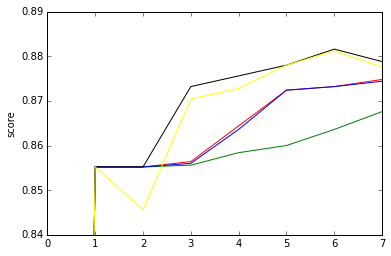

In [309]:
import matplotlib.pyplot as plt
plt.plot(E_hog_scores, color='red', label='E')
plt.plot(Q_hog_scores, color='green', label='Q')
plt.plot(T_hog_scores, color='blue', label='T')
plt.plot(G_hog_scores, color='black', label='G')
plt.plot(P_hog_scores, color='yellow', label='P')
plt.ylabel('score')
plt.ylim([0.84, 0.89])
plt.show()
#l1 metric

In [378]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_cube_train, Y_train)
%time y_result = clf.predict(X_cube_test, E, k = 7) #l9 accuracy 95,4

CPU times: user 1min 5s, sys: 8 ms, total: 1min 5s
Wall time: 1min 5s


In [379]:
clf2 = KDBasedKNearestNeighbor()
clf2 = clf.fit(hog_features, Y_train)
%time y_hog_result = clf.predict(hog_test, T, k = 7) #l1 accuracy 93,4

CPU times: user 22.9 s, sys: 0 ns, total: 22.9 s
Wall time: 22.9 s


In [808]:
y_pred = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    max_val = 0
    for c in range(10):
        val = y_pred_E_7[i][c] + y_hog_result[i][c] ** (2.1)
        if val > max_val:
            max_val = val
            y_pred[i] = c
y_pred = y_pred.astype(np.int64)
#95,52 **1/2 + 2
#95,6 **1/8 + 1 ** 2
#96,16 + **2.1

In [810]:
result = pd.DataFrame({'label':y_pred})
result.to_csv('result.csv', index_label = 'Id')

Была попытка подкрутить еще две фичи, но это было безуспешно( 

In [575]:
from scipy import ndimage as ndi
from skimage.morphology import medial_axis
import matplotlib.pyplot as plt

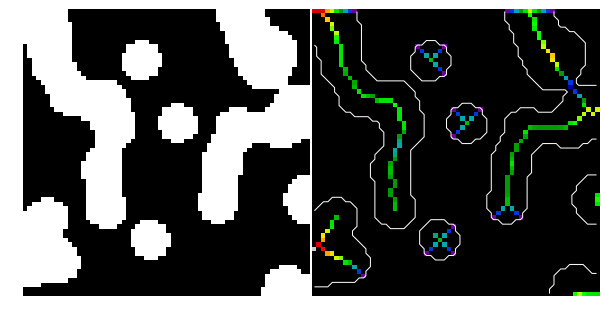

In [577]:
dist_on_skel = distance * skel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(data, [0.5], colors='w')
ax2.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
plt.show()

In [635]:
list_skel_fd = []
for image in X_train:
    list_skel_fd.append(np.reshape(medial_axis(image.reshape((28, 28))), 784))
skel_features = np.array(list_skel_fd, 'float64')

In [636]:
#np.reshape(skel_features, 784)
skel_features.shape

(20000, 784)

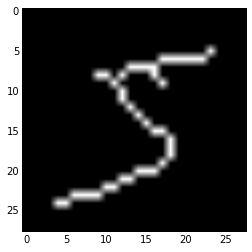

In [633]:
plot_image(skel_features[0])

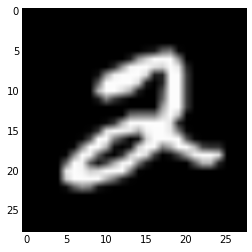

In [617]:
plot_image(X_train[5])

In [637]:
list_skel_fd = []
for image in X_test:
    list_skel_fd.append(np.reshape(medial_axis(image.reshape((28, 28))), 784))
skel_test = np.array(list_skel_fd, 'float64')

In [689]:
clf3 = KDBasedKNearestNeighbor()
clf3 = clf.fit(skel_features, Y_train)
%time y_skel_result = clf.predict(skel_test, T, k = 12) #l2 accuracy 73,9 T12

CPU times: user 1min 10s, sys: 12 ms, total: 1min 10s
Wall time: 1min 10s


In [750]:
y_pred = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    max_val = 0
    for c in range(10):
        val = max(y_pred_E_7[i][c] ** (1/8.), y_skel_result[i][c], y_hog_result[i])
        if val > max_val:
            max_val = val
            y_pred[i] = c
y_pred = y_pred.astype(np.int64)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [654]:
#multi zoning
list_mz_fd = []
for image in X_cube_train:
    tmp_im = np.reshape(image, (28, 28))
    #image.reshape((28, 28))
    im_list = []
    split21 = np.hsplit(tmp_im, 2)
    for i in range(2):
        black = 0
        for j in range(28):
            for x in split1[i][j]:
                black += 1 * (x == 0)
        im_list.append(black / (len(split1[i]) * 2))
    split12 = np.vsplit(tmp_im, 2)
    for i in range(2):
        black = 0
        for j in range(28):
            for x in split1[i][j]:
                black += 1 * (x == 0)
        im_list.append(black / (len(split2[i]) * 2))
    split22 = np.vsplit(split12[0], 2)
    split_22 = np.vsplit(split12[1], 2)
    split41 = np.hsplit(tmp_im, 4)
    split14 = np.vsplit(tmp_im, 4)
    split44 = np.vsplit(split14[0], 4)
    split44 = np.vsplit(split14[1], 4)
    
    
    
    